In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2 
import glob
import random
import tensorflow as tf
import tensorflow_hub as hub
import shutil

In [14]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('./train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  698


In [15]:
file_names = os.listdir('./train/')
#print(file_names)

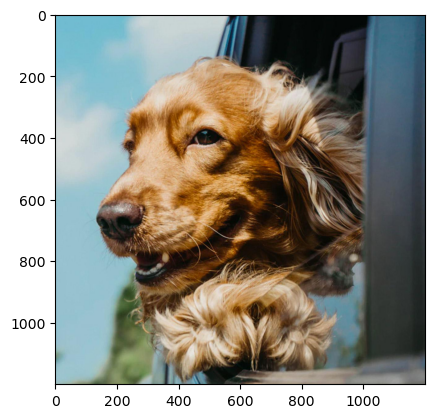

In [18]:
# display dog image
img = mpimg.imread('train/dog_423.jpg')
imgplt = plt.imshow(img)
plt.show()

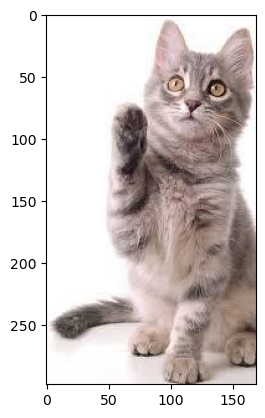

In [19]:
# display cat image
img = mpimg.imread('train/cat_191.jpg')
imgplt = plt.imshow(img)
plt.show()

In [20]:
file_names = os.listdir('./train/')

name = file_names
print(name[0:5])

['cat_386.jpg', 'cat_15.jpg', 'dog_423.jpg', 'dog_345.jpg', 'dog_351.jpg']


In [21]:
file_names = os.listdir('./train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

    name = img_file[0:3]

    if name == 'dog':
        dog_count += 1

    else:
        cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 348
Number of cat images = 350


In [26]:
#removing if the directory is already present
shutil.rmtree('./resizedImages', ignore_errors=True)
#creating a directory for resized images
os.mkdir('./resizedImages')

In [27]:
original_folder = './train/'
resized_folder = './resizedImages/'

for i in range(697):

    filename = os.listdir(original_folder)[i]
    img_path = original_folder+filename

    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    newImgPath = resized_folder+filename
    img.save(newImgPath)

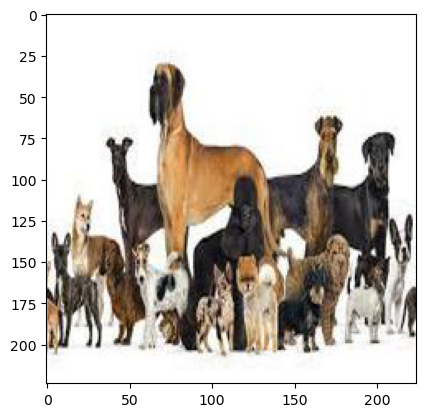

In [28]:
# display resized dog image
img = mpimg.imread('./resizedImages/dog_313.jpg')
imgplt = plt.imshow(img)
plt.show()

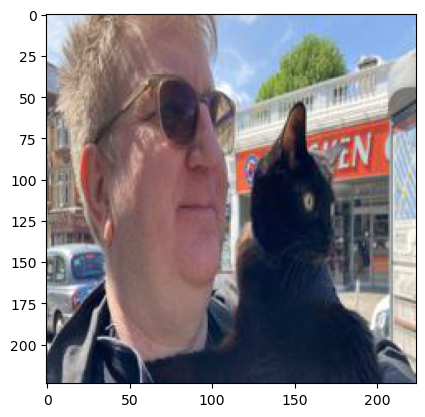

In [31]:
# display resized dog image
img = mpimg.imread('./resizedImages/cat_11.jpg')
imgplt = plt.imshow(img)
plt.show()

   ####  Classification Labels

- 0 -> Cat
- 1 -> Dog

In [33]:
# creaing a for loop to assign labels
filenames = os.listdir('./resizedImages/')


labels = []

for i in range(697):

    file_name = filenames[i]
    label = file_name[0:3]

    if label == 'dog':
        labels.append(1)

    else:
        labels.append(0)

In [34]:
print(f"Length of label list = {len(filenames)}")

for i in range(5):
    randomIndex = random.randint(0,len(filenames))
    print(filenames[randomIndex], end = "  ")


Length of label list = 697
dog_23.jpg  cat_570.jpg  cat_156.jpg  cat_547.jpg  cat_69.jpg  

In [35]:
print(f"Length of label list = {len(labels)}")

for i in range(10):
    randomIndex = random.randint(0,len(labels))
    print(labels[randomIndex], end = " ")


Length of label list = 697
0 0 1 0 0 0 1 1 0 1 

In [36]:
# counting the images of dogs and cats out of 550 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[349 348]


In [37]:
image_directory = './resizedImages/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
#type cast images -> 2D Matrix string pixel values.
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [18]:
#print(dog_cat_images)

In [38]:
type(dog_cat_images)

numpy.ndarray

In [39]:
print(dog_cat_images.shape)
##(Total Images, Matrix Rows, Matrix Columns, Parameters)

(697, 224, 224, 3)


In [40]:
X = dog_cat_images
Y = np.asarray(labels)

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state
                                                    =2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(697, 224, 224, 3) (557, 224, 224, 3) (140, 224, 224, 3)


In [43]:
# scaling the data (Normalize b/w 0 and 1)
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [53]:
# print(X_train_scaled)
# print(X_test_scaled)

In [54]:
# MobileNet V2 is a family of neural network architectures for efficient on-device image classification and related tasks

In [44]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

Metal device set to: Apple M1


2023-04-10 13:41:52.123816: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-10 13:41:52.124138: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [45]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [47]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [48]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5


2023-04-10 13:42:12.354608: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-10 13:42:13.905150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 11s 390ms/step - loss: 0.4268 - acc: 0.7953
Epoch 2/5
18/18 [==============================] - 7s 372ms/step - loss: 0.1759 - acc: 0.9318
Epoch 3/5
18/18 [==============================] - 7s 376ms/step - loss: 0.1207 - acc: 0.9569
Epoch 4/5
18/18 [==============================] - 7s 370ms/step - loss: 0.0993 - acc: 0.9587
Epoch 5/5
18/18 [==============================] - 7s 378ms/step - loss: 0.0800 - acc: 0.9785


In [49]:
score, acc = model.evaluate(X_test_scaled, Y_test)
#print('Test Loss =', score)
print('Test Accuracy =', acc*100)

2023-04-10 13:42:50.809838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 2s 407ms/step - loss: 0.1664 - acc: 0.9286
Test Accuracy = 92.85714626312256


In [50]:
def classifyImage(path):
    
    input_image = cv2.imread(path)
    plt.imshow(input_image)
    plt.show()

    input_image_resize = cv2.resize(input_image, (224,224))

    input_image_scaled = input_image_resize/255

    image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

    input_prediction = model.predict(image_reshaped)

    print(input_prediction)

    input_pred_label = np.argmax(input_prediction)

    print(f"Label Predicted: {input_pred_label}")

    if input_pred_label == 0:
        print('The image represents a Cat')

    else:
        print('The image represents a Dog')
    

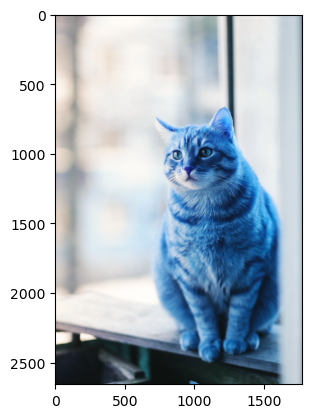

1/1 [==============================] - 1s 517ms/step
[[ 3.0484748 -2.6858888]]
Label Predicted: 0
The image represents a Cat


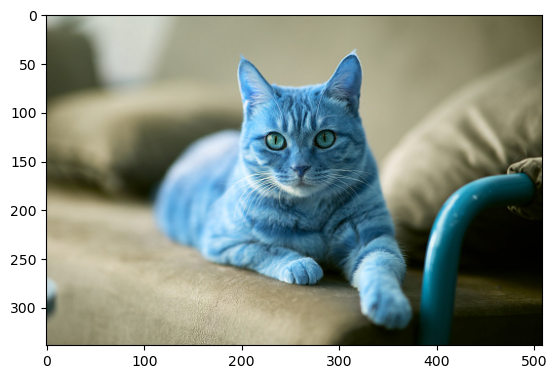

1/1 [==============================] - 0s 28ms/step
[[ 3.1301756 -2.247968 ]]
Label Predicted: 0
The image represents a Cat


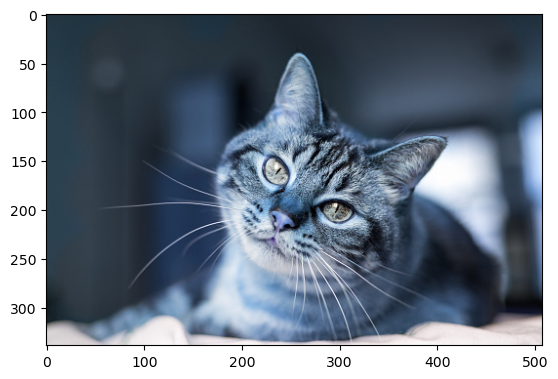

1/1 [==============================] - 0s 31ms/step
[[ 2.3254004 -2.6349308]]
Label Predicted: 0
The image represents a Cat


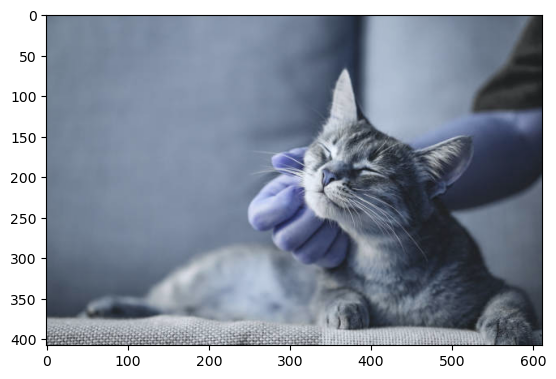

1/1 [==============================] - 0s 43ms/step
[[ 3.2132192 -4.6327057]]
Label Predicted: 0
The image represents a Cat


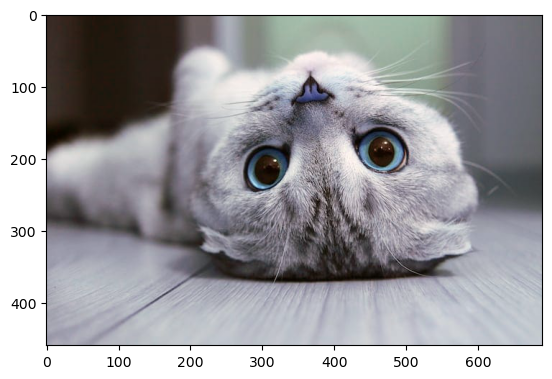

1/1 [==============================] - 0s 30ms/step
[[ 0.83214545 -0.28939232]]
Label Predicted: 0
The image represents a Cat


In [79]:
# for i in range(5):
#     imagePath = "./testingData/Cat"+str(i+1)+".jpg"
#     classifyImage(imagePath)

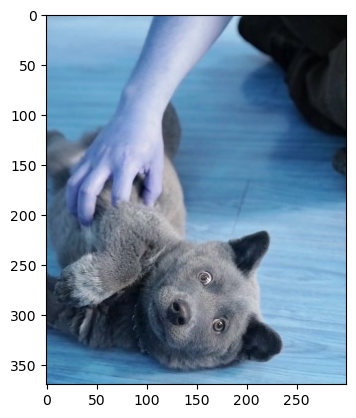

1/1 [==============================] - 0s 82ms/step
[[-0.7670487   0.27470148]]
Label Predicted: 1
The image represents a Dog


In [52]:
classifyImage("./nibata2.jpg")

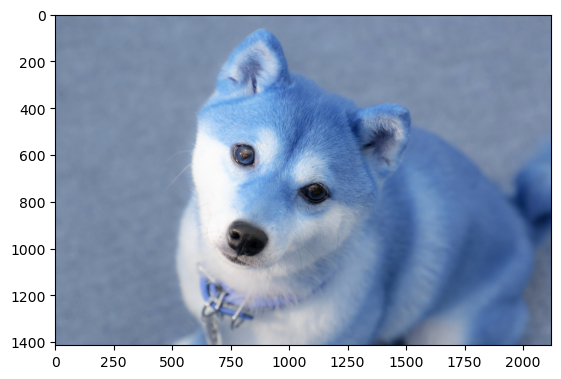

2023-04-10 13:46:49.895737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 983ms/step
[[-1.65199    1.2749382]]
Label Predicted: 1
The image represents a Dog


In [51]:
classifyImage("./nibata.jpg")

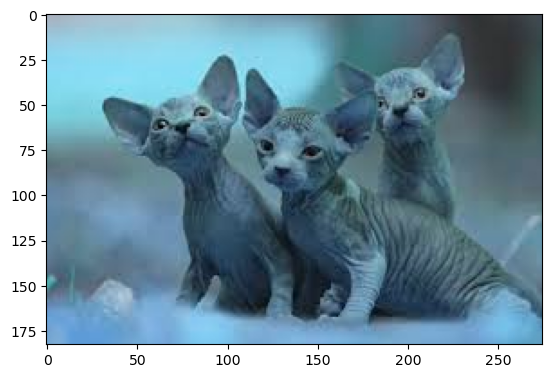

1/1 [==============================] - 0s 81ms/step
[[1.6798645 0.8933526]]
Label Predicted: 0
The image represents a Cat


In [53]:
classifyImage("./images.jpeg")